### Applying three different CNN's on the MNIST dataset

In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py
#Refer this link for making better CNN networks
#https://towardsdatascience.com/a-guide-to-an-efficient-way-to-build-neural-network-architecturespart-ii-hyper-parameter-42efca01e5d7
import warnings
warnings.filterwarnings("ignore")
#from __future__ import print_function
exec('from __future__ import absolute_import, division, print_function')
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
batch_size = 128
num_classes = 10
epochs = 12
# Preparing trainining and testing data
# input image dimensions
img_rows, img_cols = 28, 28
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#print(x_train.shape)
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [2]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334 # this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()


### Model 1; 2 conv, 2 maxpool, 3 dense layers

In [3]:
import warnings
warnings.filterwarnings("ignore")
# In this (First Model) lets follow the general structure of the lenet we will make a simple model
# Network Architecture
# input -> conv -> polling -> conv -> polling -> FC -> FC -> output
# 8 16 120 84 10
model = Sequential()
model.add(Conv2D(6, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Conv2D(25, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])
# this will train the model and validate the model in this fit function
model.summary()

# Fitting the model
history=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         60        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 25)        3775      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 25)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 625)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               75120     
_________________________________________________________________
dens

### Plotting epoch vs loss

Train score: 0.007001584335625739
Train accuracy: 99.78666666666666

************************ *********************

Test score: 0.0317619974554118
Test accuracy: 99.02


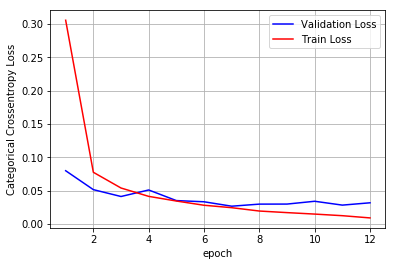

In [4]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Model 2; 3 conv, 3 maxpool, 2 dense layers

In [5]:
import warnings
warnings.filterwarnings("ignore")
# In this (First Model) lets follow the general structure of the lenet we will make a simple model
# Network Architecture
# input -> conv -> polling -> conv -> polling -> FC -> FC -> output
# 8 16 120 84 10
model = Sequential()
model.add(Conv2D(6, kernel_size= (3, 3),activation='relu',padding='same',input_shape=input_shape))
model.add(MaxPooling2D(pool_size= (2, 2),strides=2))# for the location invariants
model.add(Conv2D(25, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size= (2, 2),strides=2))# for the location invariants
model.add(Conv2D(50, kernel_size= (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants

model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])
# this will train the model and validate the model in this fit function
model.summary()

# Fitting the model
history=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         60        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 25)        3775      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 25)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 50)          11300     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 50)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 50)                0         
__________

### Plotting epoch vs loss

Train score: 0.017898814101324146
Train accuracy: 99.425

************************ *********************

Test score: 0.040494644202355996
Test accuracy: 98.72999999999999


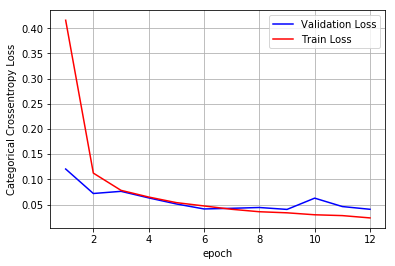

In [6]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Model 3; 4 conv, 2 maxpool, 2 dense layers

In [7]:
import warnings
warnings.filterwarnings("ignore")
# In this (First Model) lets follow the general structure of the lenet we will make a simple model
# Network Architecture
# input -> conv -> polling -> conv -> polling -> FC -> FC -> output
# 8 16 120 84 10
model = Sequential()
model.add(Conv2D(6, kernel_size= (3, 3),activation='relu',padding='same',input_shape=input_shape))
model.add(Conv2D(25, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size= (2, 2),strides=2))# for the location invariants
model.add(Conv2D(25, (5, 5), activation='relu'))
model.add(Conv2D(50, kernel_size= (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants


model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])
# this will train the model and validate the model in this fit function
model.summary()

# Fitting the model
history=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 6)         60        
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 25)        3775      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 25)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 25)          15650     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 6, 6, 50)          11300     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 50)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 450)               0         
__________

### Plotting epoch vs loss

Train score: 0.008717105705489423
Train accuracy: 99.72333333333333

************************ *********************

Test score: 0.023684316596121063
Test accuracy: 99.29


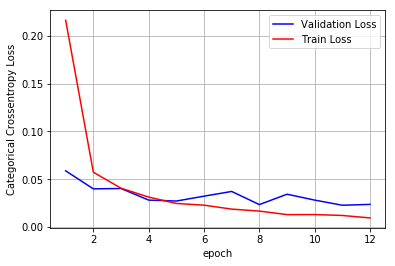

In [8]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Model 1; 2 conv, 2 maxpool, 3 dense layers, dropout = 0.1

In [9]:
import warnings
warnings.filterwarnings("ignore")
# In this (First Model) lets follow the general structure of the lenet we will make a simple model
# Network Architecture
# input -> conv -> polling -> conv -> polling -> FC -> FC -> output
# 8 16 120 84 10
model = Sequential()
model.add(Conv2D(6, kernel_size=(3, 3),activation='relu',padding='same',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Conv2D(25, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])
# this will train the model and validate the model in this fit function
model.summary()

# Fitting the model
history=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 6)         60        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 25)        3775      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 25)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 25)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 625)               0         
___________________________

### Plotting epoch vs loss

Train score: 0.008950809193263316
Train accuracy: 99.71833333333333

************************ *********************

Test score: 0.03041393990173674
Test accuracy: 99.06


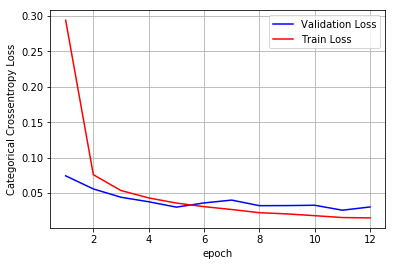

In [10]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Model 2; 3 conv, 3 maxpool, 2 dense layers, dropout = 0.5

In [11]:
import warnings
warnings.filterwarnings("ignore")
# In this (First Model) lets follow the general structure of the lenet we will make a simple model
# Network Architecture
# input -> conv -> polling -> conv -> polling -> FC -> FC -> output
# 8 16 120 84 10
model = Sequential()
model.add(Conv2D(6, kernel_size= (3, 3),activation='relu',padding='same',input_shape=input_shape))
model.add(MaxPooling2D(pool_size= (2, 2),strides=2))# for the location invariants
model.add(Conv2D(25, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size= (2, 2),strides=2))# for the location invariants
model.add(Conv2D(50, kernel_size= (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants

model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])
# this will train the model and validate the model in this fit function
model.summary()

# Fitting the model
history=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 6)         60        
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 25)        3775      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 25)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 50)          11300     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 1, 1, 50)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 1, 50)          0         
__________

### Plotting epoch vs loss

Train score: 0.034344911297610574
Train accuracy: 98.92

************************ *********************

Test score: 0.0437344656774716
Test accuracy: 98.66


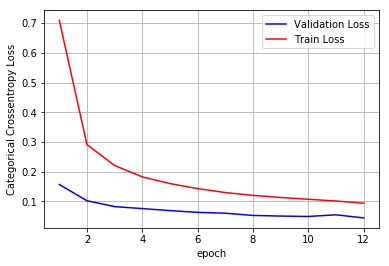

In [12]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Model 3; 4 conv, 2 maxpool, 2 dense layers, dropout = 0.9

In [13]:
import warnings
warnings.filterwarnings("ignore")
# In this (First Model) lets follow the general structure of the lenet we will make a simple model
# Network Architecture
# input -> conv -> polling -> conv -> polling -> FC -> FC -> output
# 8 16 120 84 10
model = Sequential()
model.add(Conv2D(6, kernel_size= (3, 3),activation='relu',padding='same',input_shape=input_shape))
model.add(Conv2D(25, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size= (2, 2),strides=2))# for the location invariants
model.add(Conv2D(25, (5, 5), activation='relu'))
model.add(Conv2D(50, kernel_size= (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))# for the location invariants

model.add(Dropout(0.9))
model.add(Flatten())

model.add(Dense(120, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.adam(),
              metrics=['accuracy'])
# this will train the model and validate the model in this fit function
model.summary()

# Fitting the model
history=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  verbose=1,
                  validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 28, 28, 6)         60        
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 25)        3775      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 25)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 8, 8, 25)          15650     
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 6, 6, 50)          11300     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 3, 3, 50)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 3, 3, 50)          0         
__________

### Plotting epoch vs loss

Train score: 0.021970069334746708
Train accuracy: 99.31333333333333

************************ *********************

Test score: 0.02319188763093698
Test accuracy: 99.27


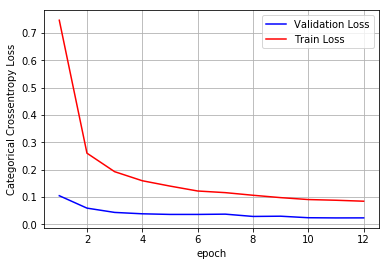

In [14]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train score:', score[0])
print('Train accuracy:', score[1]*100)
print('\n************************ *********************\n')
#test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1]*100)
# plot
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch');
ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,12+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

### Compare all the model results

In [16]:
from prettytable import PrettyTable
tb = PrettyTable()
tb.field_names= ("conv_layers", "MAxPoll_layers", "Dense_layers","Dropout","Train Accuracy","Validation Accuracy")
tb.add_row(["2", "2", "3", "NO", 99.74, 99.02])
tb.add_row(["3", "3", "2", "NO", 99.27, 98.73])
tb.add_row(["4", "2", "2", "NO", 99.69, 99.29])
tb.add_row(["2", "2", "3", "0.1", 99.50, 99.06])
tb.add_row(["3", "3", "2", "0.5", 97.16, 98.66])
tb.add_row(["4", "2", "2", "0.9", 97.48, 99.27])

print(tb.get_string(titles = "CNN Models - Observations"))

+-------------+----------------+--------------+---------+----------------+---------------------+
| conv_layers | MAxPoll_layers | Dense_layers | Dropout | Train Accuracy | Validation Accuracy |
+-------------+----------------+--------------+---------+----------------+---------------------+
|      2      |       2        |      3       |    NO   |     99.74      |        99.02        |
|      3      |       3        |      2       |    NO   |     99.27      |        98.73        |
|      4      |       2        |      2       |    NO   |     99.69      |        99.29        |
|      2      |       2        |      3       |   0.1   |      99.5      |        99.06        |
|      3      |       3        |      2       |   0.5   |     97.16      |        98.66        |
|      4      |       2        |      2       |   0.9   |     97.48      |        99.27        |
+-------------+----------------+--------------+---------+----------------+---------------------+
